# Program: seminar i corporate finance

## Kapital struktur: et dansk studie - optimal gælds græd 

In [57]:
# nedenstående kode er til at hente data og finde ud af hvor mange observationer der er pr. firma i dataen
# datasættet består af 25 observationer pr. firma der er 158 firmaer i alt

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Excel file
# hent data fra excel filen 'financielle_data_renset.xlsx'
data = pd.read_excel('financielle_data_renset.xlsx')

# sorter data efter firma kode og år med den ældste år først
data = data.sort_values(by=['firma kode', 'year'])

# i data filen 'data' laves en variable kaldt *growth* som er den procentvise vækst i 'Total Revenue' fra år til år 
data['Growth']= data['Total Revenue'].pct_change() * 100

# Group by 'firma kode' and calculate 3-year rolling average
data['risk average'] = data.groupby('firma kode')['EBITDA/Tot Assets, %'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate deviation from the rolling average
data['risk'] = data['EBITDA/Tot Assets, %'] - data['risk average']

data.head()  # Display the first few rows of the DataFrame


### det her nede er en test af data
# Step 2: Count the number of observations per "firma kode"
#obs_per_firm = data['firma kode'].value_counts()

# Step 3: Print or save the result
#print(obs_per_firm)

# make a variable if the number of observations is not 25 
#obs_per_firm_wrong = obs_per_firm[obs_per_firm != 25]

#print(obs_per_firm_wrong)


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent","Long Term Debt to Total Capital, Percent",Net Debt To EBITDA (Daily Time Series Ratio),"Effective Tax Rate, (%)",Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk
24,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
23,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
22,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
21,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
20,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0


#### merger med branche data 

In [58]:
## merge with the dataset 'branche data.xlsx'

# load data 'branche data.xlsx'
branche_data = pd.read_excel('branche data.xlsx')

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' 
# with 'data' as a left join 'branche_data' as b on 'firma kode' = 'firma kode'
# from b take only variable 'Company Common Name' and 'NAICS Sector Name'               !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge = pd.merge(data, branche_data[['Firma kode', 'Company Common Name', 'NAICS Sector Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_merge.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information


##### her fjernes observations hvor alle variable er 0 samt Finance and Insurance branchen 

In [59]:
# data test 
# make a copi of data called data_test
data_test = data_merge.copy()

# define all columns
cols_to_check = [
    "ROA Total Assets, Percent",
    "ROE Total Equity %",
    "EBITDA/Tot Assets, %",
    "Tot Assets/Comm Eqty",
    "Total Debt to Total Equity, Percent",
    "Long Term Debt to Total Capital, Percent",
    "Net Debt To EBITDA (Daily Time Series Ratio)",
    "Effective Tax Rate, (%)",
    "Quick Ratio",
    "EBITDA Margin, Percent",
    "Total Revenue",
    "Total Cash Dividends Paid, Cumulative"
]


# make the data_test sort out all obs if if alle variablerne er 0
data_test = data_test[
    (data_test[cols_to_check] != 0).any(axis=1)  # Keep rows where at least one column is not zero
]

# drop rows if 'NAICS Sector Name' is == "Finance and Insurance"
data_test = data_test[data_test['NAICS Sector Name'] != "Finance and Insurance"]

# make a variable called 'debt to assets ratio' by dividing 'Total Debt to Total Equity, Percent' with 'Tot Assets/Comm Eqty'
data_test['debt to assets ratio'] = data_test['Total Debt to Total Equity, Percent'] / data_test['Tot Assets/Comm Eqty']


data_test.head()  # Display the first few rows of the DataFrame

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name,debt to assets ratio
13,5PG.OL,2013-12-31 00:00:00,31,12,2013,0.000000,0.000000,0.000000,2.313655,83.113728,...,8.786299,5372000,0,inf,0.000000,0.000000,5PG.OL,5Th Planet Games A/S,Information,35.923133
14,5PG.OL,2014-12-31 00:00:00,31,12,2014,-8.789692,-14.383955,-2.942815,1.386966,20.551066,...,-19.151955,6344000,0,18.093820,-0.980938,-1.961877,5PG.OL,5Th Planet Games A/S,Information,14.817277
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,-519.918699,3198000,0,-49.590164,-10.671772,-18.400730,5PG.OL,5Th Planet Games A/S,Information,10.896584
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,-301.838304,5331000,0,66.697936,-22.200217,-12.385118,5PG.OL,5Th Planet Games A/S,Information,17.044044
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,-520.729685,3618000,0,-32.132808,-33.779405,-3.900972,5PG.OL,5Th Planet Games A/S,Information,4.485097


## Her skal data filteres 

Det datasæt den laves nedenunder der hedder "data_filter" giver signifikante estimationer. Vi skal derfor lave en mere grund filtering af outliers også bruge det datasæt til at lave den videre analyse. 

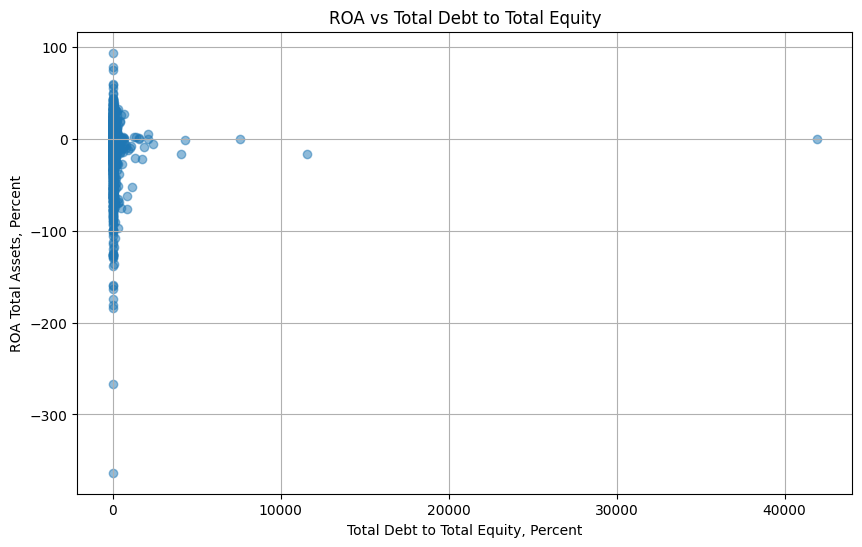

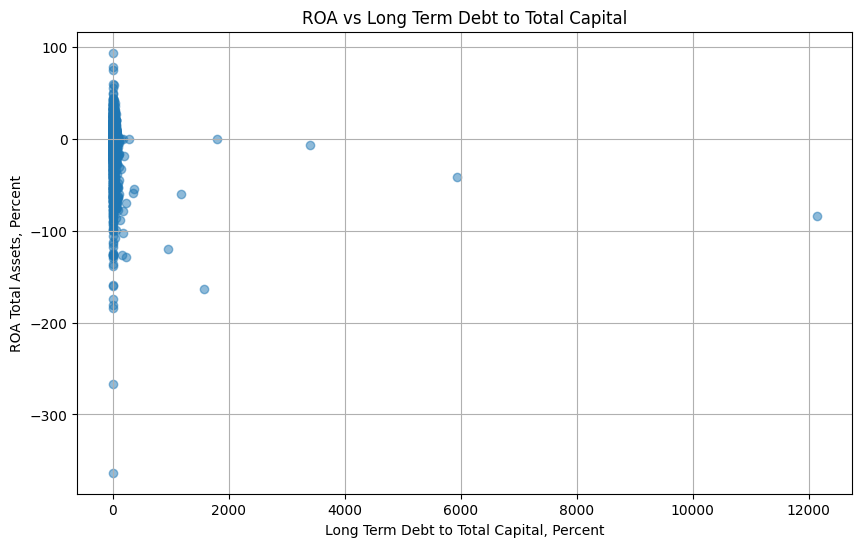

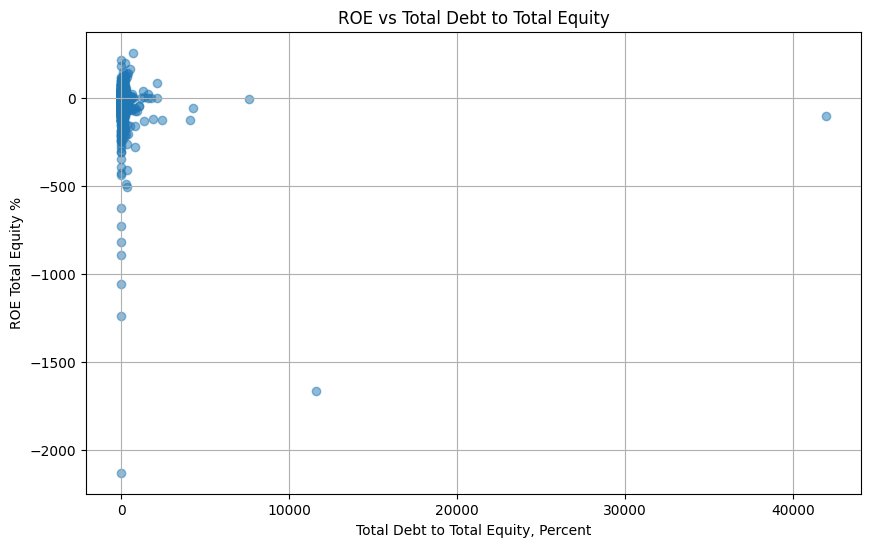

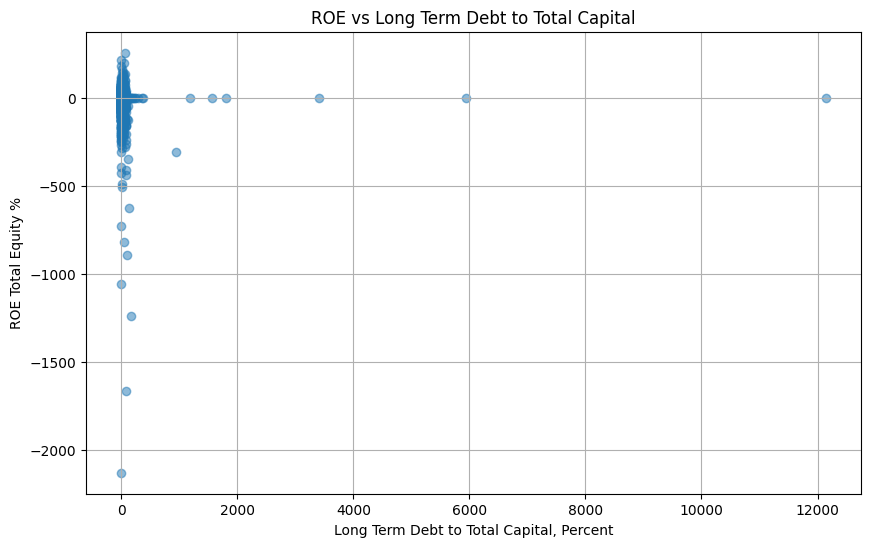

In [56]:
# Here we make four figures showing the ROA Total Assets, Percent and ROE Total Equity % agianst Total Debt to Total Equity, Percent and Long Term Debt to Total Capital, Percent

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
# here we make a sorted dataset with only the year 2023 and and cut off 'ROA Total Assets, Percent' lower than "-50" and 'Total Debt to Total Equity, Percent' higher than "200"
#data_2023_filter = data[data['year'] == 2023]

#data_filter = data_test[(data_test['ROA Total Assets, Percent'] > -100) & (data_test['Total Debt to Total Equity, Percent'] < 200) & (data_test['Long Term Debt to Total Capital, Percent'] < 100)]
data_filter = data_test.copy()

# data test 
# make a copi of data called data_test
#data_test = data.copy()
#data_test.head(40)  # Display the first few rows of the DataFrame

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Total Debt to Total Equity, Percent'], data_filter['ROA Total Assets, Percent'], alpha=0.5)  
plt.title('ROA vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROA Total Assets, Percent')
plt.grid(True)

# first plot 'ROA Total Assets, Percent'against 'Term Debt to Total Capital, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Long Term Debt to Total Capital, Percent'], data_filter['ROA Total Assets, Percent'], alpha=0.5)
plt.title('ROA vs Long Term Debt to Total Capital')
plt.xlabel('Long Term Debt to Total Capital, Percent')
plt.ylabel('ROA Total Assets, Percent')
plt.grid(True)

# first plot 'ROA Total Assets, Percent'against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Total Debt to Total Equity, Percent'], data_filter['ROE Total Equity %'], alpha=0.5)  
plt.title('ROE vs Total Debt to Total Equity')
plt.xlabel('Total Debt to Total Equity, Percent')  
plt.ylabel('ROE Total Equity %')
plt.grid(True)

# first plot 'ROA Total Assets, Percent'against 'Term Debt to Total Capital, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_filter['Long Term Debt to Total Capital, Percent'], data_filter['ROE Total Equity %'], alpha=0.5)
plt.title('ROE vs Long Term Debt to Total Capital')
plt.xlabel('Long Term Debt to Total Capital, Percent')
plt.ylabel('ROE Total Equity %')
plt.grid(True)

plt.show()

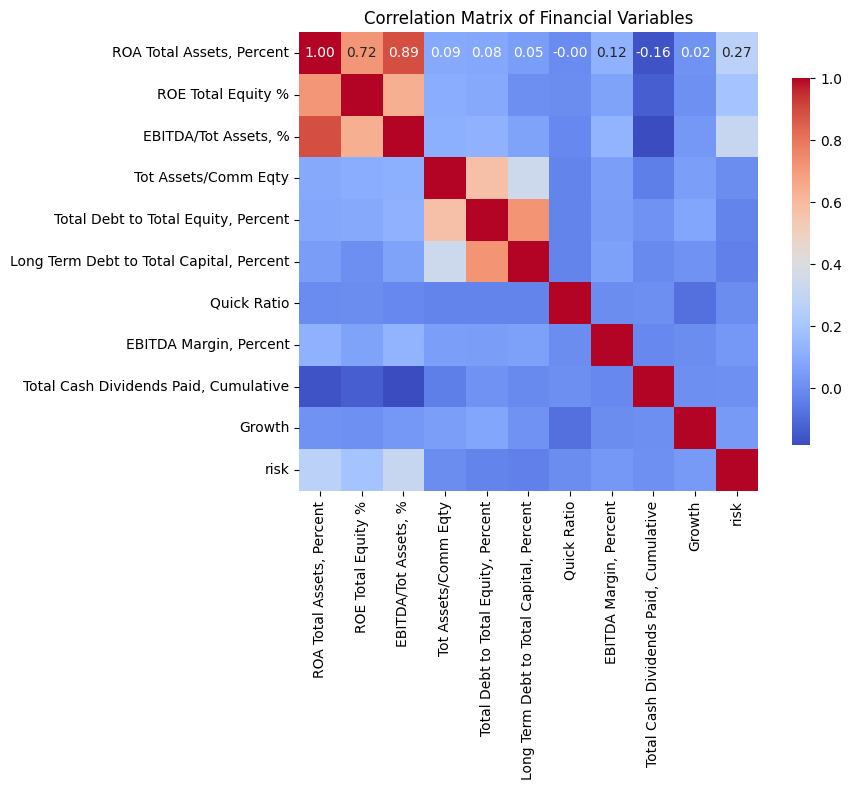

In [52]:
# here we make a correlation matrix of the data set for the variables 'ROA Total Assets, Percent', 'ROE Total Equity %',	'EBITDA/Tot Assets, %',	'Tot Assets/Comm Eqty',	'Total Debt to Total Equity, Percent',	'Long Term Debt to Total Capital, Percent',	'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth'
# and print it 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns for correlation
columns = [
    'ROA Total Assets, Percent',
    'ROE Total Equity %',
    'EBITDA/Tot Assets, %',
    'Tot Assets/Comm Eqty',
    'Total Debt to Total Equity, Percent',
    'Long Term Debt to Total Capital, Percent', 
    'Quick Ratio',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
# Create a new DataFrame with the selected columns
data_subset = data_filter[columns]
# Calculate the correlation matrix
correlation_matrix = data_subset.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Financial Variables')
plt.tight_layout()
plt.show()


In [ ]:
# make a linear regression model with ROA Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_filter['ROA Total Assets, Percent']
X = data_filter[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent', 'Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent'
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit()
# Print the summary of the regression model

# regression with 'Total Debt to Total Equity, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_filter['ROE Total Equity %']
X = data_filter[['Total Debt to Total Equity, Percent', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent', 'Total Cash Dividends Paid, Cumulative', 'Growth']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_TDTE = sm.OLS(y, X).fit()


# Print the summary of the regression model
print(model_LTD.summary())
#print(model_TDTE.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.205
Model:                                   OLS   Adj. R-squared:                  0.202
Method:                        Least Squares   F-statistic:                     78.76
Date:                       Wed, 02 Apr 2025   Prob (F-statistic):           9.11e-88
Time:                               18:27:04   Log-Likelihood:                -7859.7
No. Observations:                       1839   AIC:                         1.573e+04
Df Residuals:                           1832   BIC:                         1.577e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------